# PROVA - Inteligência Artificial 

#### Aluno: João Victor Alcoforado de Araújo
#### Matrícula: 20180083830


## 1. (1 Ponto) Para cada um dos agentes a seguir, desenvolva uma descrição completando a tabela abaixo sobre o ambiente de tarefas de cada um.

#### (a) Robô jogador de futebol.
1. **Contexto:** Robô jogador de FIFA.
2. **Medidas de Desempenho:** Tempo de posse de bola e número de gols.
3. **Ambiente:** Campo de futebol do jogo.
4. **Atuadores:** Ações do jogo (ex:. movimentação, passe de bola, chute…).
5. **Sensores:** Imagens do jogo em tempo real.


#### (b)  Agente de compras na Internet.
1. **Contexto:** Assistente de compras para compra de produtos com melhor preço em relação ao seu respectivo histórico de preços. 
2. **Medidas de Desempenho:** Compra de produtos com menor preço em relação à seus respectivos  históricos de preço, dentro de um período de tempo especificado.
3. **Ambiente:** Sites de compras mapeados para atuação do agente.
4. **Atuadores:** Compra de produtos com preço classificado como satisfatório
5. **Sensores:** Preço atual e histórico de preços de um produto específico nos sites mapeados.



#### (c) Robô explorador de Marte.
1. **Contexto:** Robô explorador para análise de matéria da superfície de Marte.  
2. **Medidas de Desempenho:** Amostragem representativa de materiais da superfície de Marte e análise adequada.
3. **Ambiente:** Superfície de marte.
4. **Atuadores:** Controle de movimentação, sistema de visão, coleta de material e realização de análise de material.
5. **Sensores:** Dados dos sistemas de visão, movimentação, ações de coleta de material e sistema de análise de material.

## 2. (1 Ponto) Diferencie os 4 tipos de aprendizado de máquina. Para tanto, escolha uma base de dados do Kaggle e explique como aplicar os 4 métodos nessa mesma base.

A aprendizagem supervisionada precisa que todas as instâncias de treinamento possuam rótulo para treinamento e construção de modelos de predição. Além disso, os modelos podem ser de classificação, quando rotula os dados de entrada em classes, e regressão, quando rotula os dados de entrada em valores contínuos. Neste dataset, o aprendizado supervisionado no contexto de regressão poderia ser aplicado para predizer a expectativa de vida de um determinado país, a partir de indicadores de desempenho como: escolaridade, composição da renda, taxas de mortalidade, imunização, gasto com saúde e índice de desenvolvimento humano. Ainda no contexto supervisionado, o índice de Massa Corporal (IMC) médio poderia ser transformado nos seguintes atributos qualitativos: abaixo do peso, saudável, acima do peso e obesidade. Assim, a categoria de IMC  representativa do país também poderia ser predita a partir de seus indicadores de desempenho.

Ademais, a aprendizagem semi-supervisionada possibilita treinar modelos de classificação com dados parcialmente rotulados. Neste caso, também poderia ser usado  para prever a expectativa de vida a partir dos indicadores de desempenho. Entretanto, poderia proporcionar uma vantagem adicional, por não precisar descartar as instâncias sem a label de expectativa de vida. Além disso, poderia ser usado no pré-processamento de dados, para tratamento dos dados nulos de população e produto interno bruto per capita. 	Na aprendizagem não supervisionada as instâncias são agrupadas com base em características similares, inferidas a partir de seus atributos, sem a necessidade de rótulo. Assim poderia-se usar aprendizagem não supervisionada com o intuito de agrupar países com perfis de desenvolvimento similares. 

Por fim, a aprendizagem por reforço funciona através de sistema de feedback, no qual os comportamentos desejáveis são incentivados e os não desejáveis são reprimidos. Nesse contexto, poderia-se usar aprendizagem por reforço para simular uma tarefa de classificação como a do IMC, para tanto, o dataset seria usado para modelar o ambiente, a métrica de desempenho poderia ser o número de instâncias corretamente classificadas e ações seriam a rotulação dos dados.


## 3. (2,5 Pontos) Em um Jupyter Notebook (link do collab ou arquivo) analise a base de dados selecionada na questão anterior (no contexto SUPERVISIONADO) e calcule a matriz de correlação entre os atributos de entrada e o atributo-alvo. Selecione quais atributos continuariam em sua base, definindo um limiar de correlação e explicando sua escolha. Além disso, aplique o método de PCA e mostre os 5 e 10 componentes principais.

#### FUNÇÕES AUXILIARES

In [ ]:
class KnnExecutor:

    def __init__(self, data, label_encoder=False, corr_limit=None, pca_components=None):
        self.dataset = data
        self._fit_transform_corr_limit(corr_limit)
        self._split_train_test(label_encoder)
        self._fit_transform_pca(pca_components)
    
    def _split_train_test(self, label_encoder):
        X = self.dataset.iloc[:, :-1].values; Y = self.dataset.iloc[:, -1].values

        if label_encoder:
            self.label_encoder = LabelEncoder()
            Y = self.label_encoder.fit_transform(Y)
        
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, Y, test_size=0.2, random_state=1)    


    def _fit_transform_corr_limit(self, corr_limit):
        if corr_limit == None: return

        corr_scale = self.dataset.corr().abs().iloc[:, -1]
        to_drop = corr_scale[corr_scale < corr_limit].index
        self.dataset = self.dataset.drop(columns=to_drop)


    def _fit_transform_pca(self, pca_components):
        if pca_components == None: return

        scaler = StandardScaler()
        self.x_train = scaler.fit_transform(self.x_train) 
        self.x_test = scaler.transform(self.x_test)

        pca = PCA(n_components = pca_components)
        pca.fit(self.x_train)

        self.x_train = pca.transform(self.x_train)
        self.x_test = pca.transform(self.x_test)


    def execute(self, model, n_neighbors, metric, scoring):
        from collections.abc import Iterable
        parameters = {
            'n_neighbors': n_neighbors if isinstance(n_neighbors, Iterable) else [n_neighbors],
            'metric': metric if not isinstance(metric, str) else [metric],
            'algorithm': ['auto'],
        }

        self.model = GridSearchCV(model(), param_grid=parameters, scoring=scoring)
        self.model.fit(self.x_train, self.y_train)
        self.y_pred = self.model.predict(self.x_test)


    def classifier(self, n_neighbors=1, metric='minkowski', scoring='accuracy'):
        self.execute(KNeighborsClassifier, n_neighbors, metric, scoring)
        self.classification_report()

    def regressor(self, n_neighbors=1, metric='minkowski', scoring='r2'):
        self.execute(KNeighborsRegressor, n_neighbors, metric, scoring)
        self.regression_report()


    def classification_report(self):
        report = classification_report(self.y_test, self.y_pred, target_names=self.label_encoder.classes_)
        print(report)

        print('Confusion Matrix')
        print(confusion_matrix(self.y_test, self.y_pred))


    def regression_report(self):
        print(f'r2_score: {r2_score(self.y_test, self.y_pred):.2f}')
        print(f'mean_squared_error: {mean_squared_error(self.y_test, self.y_pred):.2f}')
        print(f'explained_variance_score: {explained_variance_score(self.y_test, self.y_pred):.2f}')

In [ ]:
def cut_bmi(value):
    if value < 18.5: return 'underweight'
    elif value < 25: return 'healthy'
    elif value < 30: return 'overweight'
    else: return 'obesity'   

#### DEPENDÊNCIAS E AMBIENTE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, explained_variance_score
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import classification_report

In [ ]:
%matplotlib inline
cmap = sns.diverging_palette(240, 10, as_cmap=True)

#### ANÁLISE EXPLORATÓRIA

In [ ]:
lfexpect = pd.read_csv('https://raw.githubusercontent.com/joaovictor42/IA/main/life_expectancy_dataset.csv')

In [ ]:
lfexpect.head()

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness1-19y,thinness5-9y,income_composition,schooling,life_expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [ ]:
lfexpect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 2938 non-null   object 
 1   year                    2938 non-null   int64  
 2   status                  2938 non-null   object 
 3   adult_mortality         2928 non-null   float64
 4   infant_deaths           2938 non-null   int64  
 5   alcohol                 2744 non-null   float64
 6   percentage_expenditure  2938 non-null   float64
 7   hepatitis_b             2385 non-null   float64
 8   measles                 2938 non-null   int64  
 9   bmi                     2904 non-null   float64
 10  under_five_deaths       2938 non-null   int64  
 11  polio                   2919 non-null   float64
 12  total_expenditure       2712 non-null   float64
 13  diphtheria              2919 non-null   float64
 14  hiv_aids                2938 non-null   

In [ ]:
lfexpect.describe()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness1-19y,thinness5-9y,income_composition,schooling,life_expectancy
count,2938.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
mean,2007.518720,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,4.613841,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,2004.000000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,2008.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,2012.000000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000
max,2015.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,89.000000


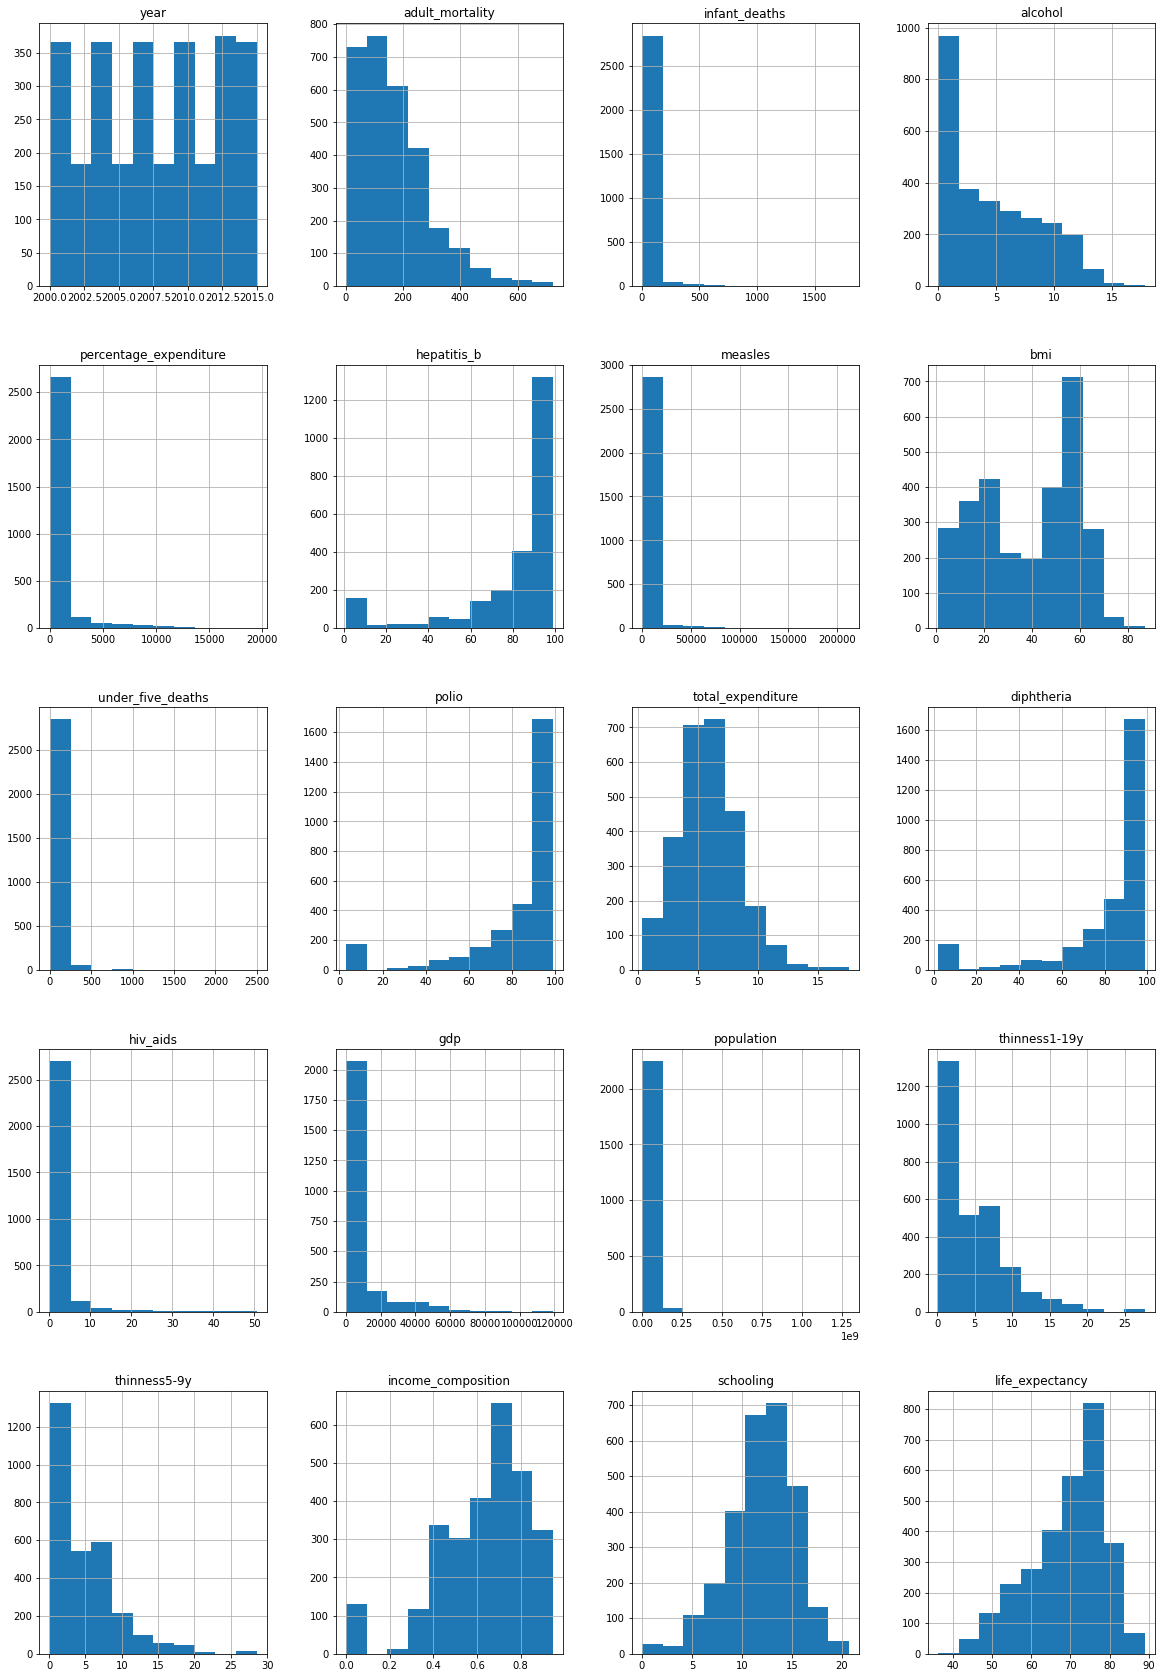

In [ ]:
lfexpect.hist(figsize=(20, 30))
plt.show()

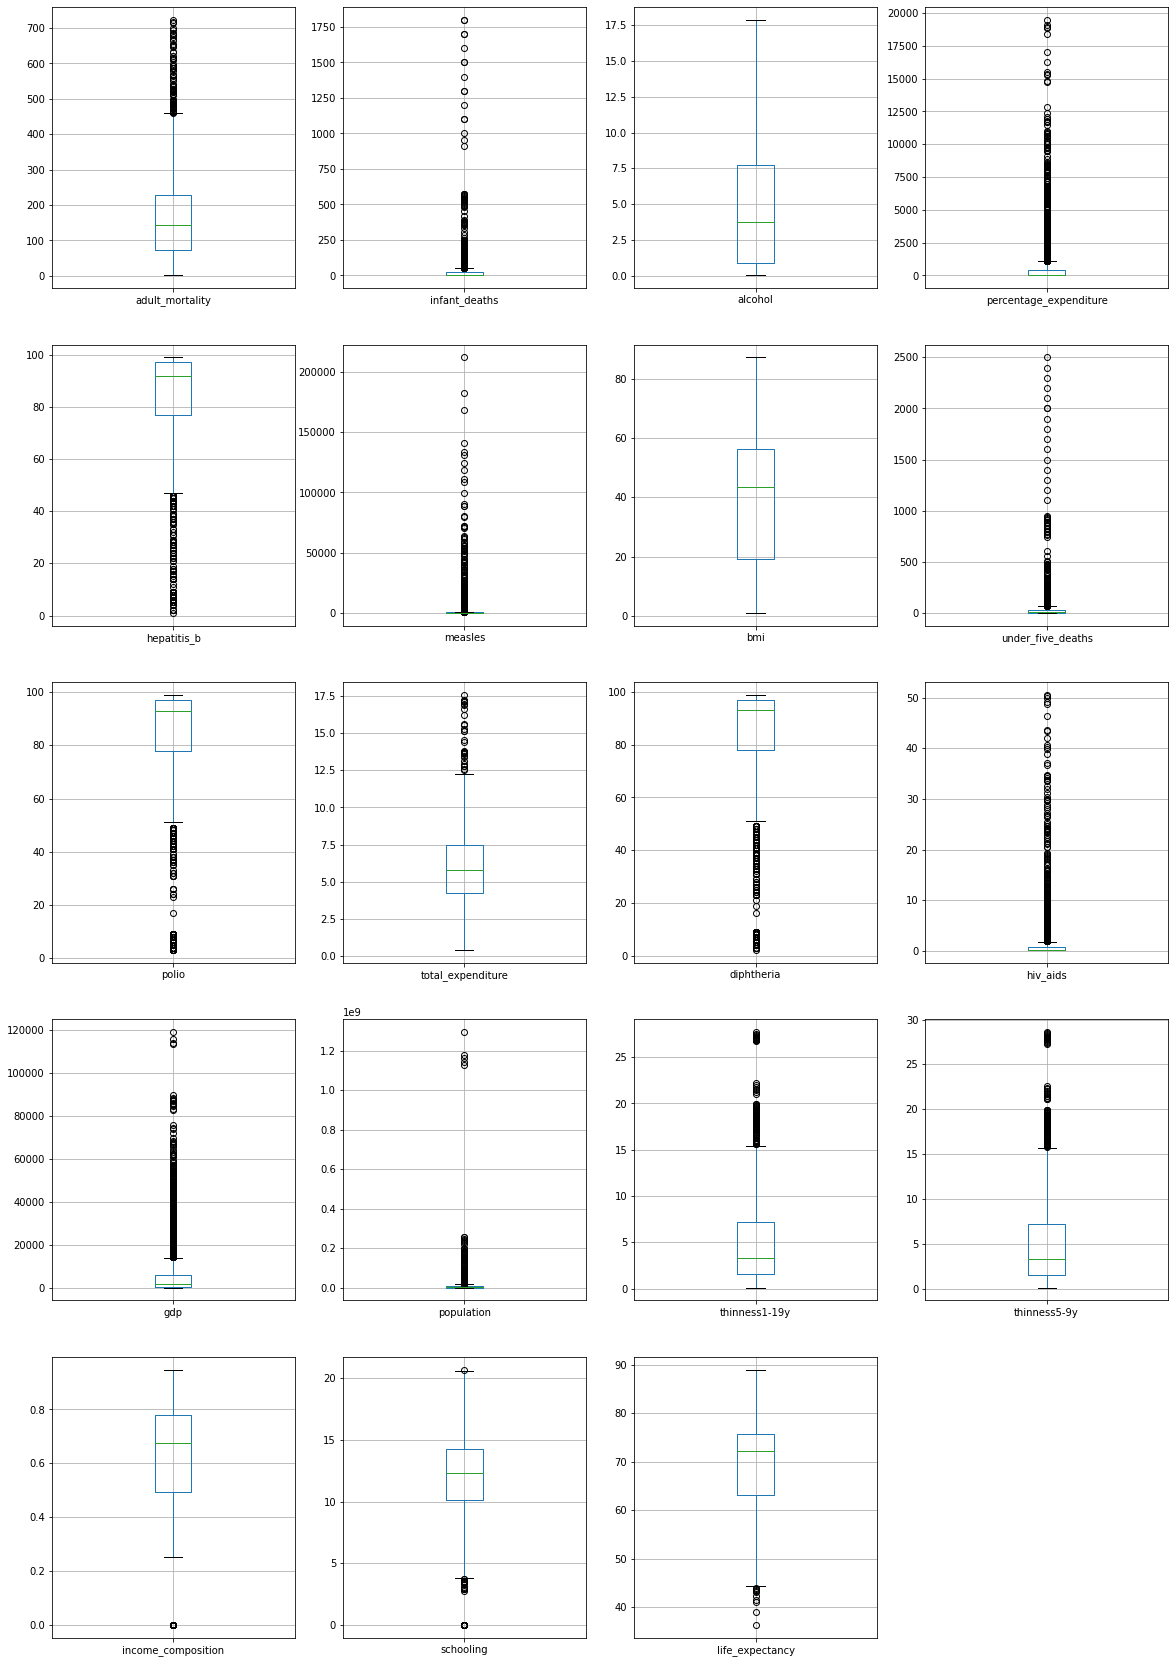

In [ ]:
plt.figure(figsize=(20,30))
lfexpect_numeric = lfexpect.drop(columns=['country', 'status', 'year'])
for index, column in enumerate(lfexpect_numeric.columns):
        plt.subplot(5, 4, index+1)
        lfexpect.boxplot(column=[column])

In [ ]:
lfexpect.isnull().sum()

country                     0
year                        0
status                      0
adult_mortality            10
infant_deaths               0
alcohol                   194
percentage_expenditure      0
hepatitis_b               553
measles                     0
bmi                        34
under_five_deaths           0
polio                      19
total_expenditure         226
diphtheria                 19
hiv_aids                    0
gdp                       448
population                652
thinness1-19y              34
thinness5-9y               34
income_composition        167
schooling                 163
life_expectancy            10
dtype: int64

In [ ]:
#Dataset construido a partir de uma serie temporal
#Praticamente todas as intâncias têm 16 anos de dados acumulados na serie histórica
lfexpect.value_counts('country', ascending=False).value_counts()

16    183
1      10
dtype: int64

#### MATRIZ DE CORRELAÇÃO

In [ ]:
corr = lfexpect.corr()

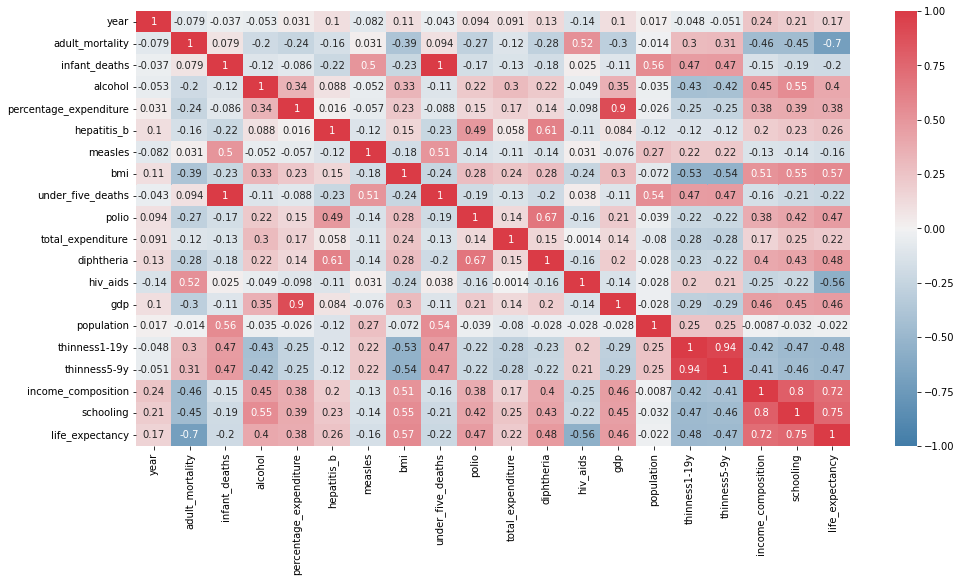

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot=True)
plt.show()

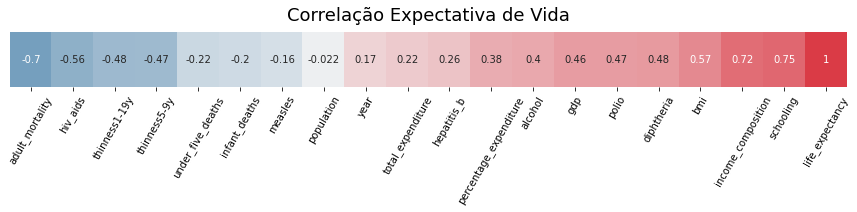

In [ ]:
plt.figure(figsize=(15, 1))
corr_scale = corr[['life_expectancy']].sort_values(by='life_expectancy').transpose()
heatmap = sns.heatmap(corr_scale, vmin=-1, vmax=1, cmap=cmap, annot=True, cbar=False)
heatmap.set_title('Correlação Expectativa de Vida', fontdict={'fontsize':18}, pad=12)
heatmap.set(yticks=[]); plt.xticks(rotation=60)
plt.show()

O limiar de correlação escolhido foi 0.40. Essa decisão se fundamenta nos intervalos de correlação descritos, a literatura afirma que, a partir desse valor, as variáveis expressam correlação moderada. Outro fator decisor foi o impacto percebido no modelo a partir dessa escolha de intervalo. Dessa forma, a simplificação dos dados do modelo pode contribuir para melhores resultados.  Por fim, as seguintes colunas foram mantidas: status, adult_mortality, alcohol, polio, diphtheria, hiv_aids, thinness1-19y, thinness5-9y, income_composition, schooling, life_expectancy e bmi.

## 4. (2 Pontos) Em um Jupyter Notebook (link do collab ou arquivo), utilize o método K vizinhos mais próximos na base escolhida na questão anterior para um contexto SUPERVISIONADO e transforme-o de forma que ele seja um problema de CLASSIFICAÇÃO e REGRESSÃO e:

### 4.1. Aplique processos de pré-processamento necessários para execução do método K-NN.

 #### PRÉ-PROCESSAMENTO

In [ ]:
#Remoção que tem apenas uma ocorrência na serie histórica 
country_count = lfexpect['country'].value_counts()
only_once = country_count[country_count == 1].index
lfexpect = lfexpect[~lfexpect['country'].isin(only_once)]

In [ ]:
#Substituição dos valores nulos de cada coluna respectiva média do pais na série histórica
null_count = lfexpect.isnull().sum()
mv_columns = null_count[null_count > 0].index

for column in mv_columns:
    lfexpect.loc[:, column] = lfexpect[column].fillna(
        lfexpect.groupby('country')[column].transform('mean')
    )

In [ ]:
#Os nulos são atributos sem correspondência na sua respeciva série histórica
lfexpect.isnull().sum()

country                     0
year                        0
status                      0
adult_mortality             0
infant_deaths               0
alcohol                    16
percentage_expenditure      0
hepatitis_b               144
measles                     0
bmi                        32
under_five_deaths           0
polio                       0
total_expenditure          32
diphtheria                  0
hiv_aids                    0
gdp                       400
population                640
thinness1-19y              32
thinness5-9y               32
income_composition        160
schooling                 160
life_expectancy             0
dtype: int64

In [ ]:
#Remoção das colunas com muitos dados nulos
lfexpect = lfexpect.drop(columns=['gdp', 'population'])

#Remoção das colunas que não serão mais usadas no dataset 
lfexpect = lfexpect.drop(columns=['country', 'year'])

In [ ]:
#Label ecoding manual
lfexpect['status'] = lfexpect['status'].replace({'Developing': 1, 'Developed': 0})

In [ ]:
#Substituição de dados por similaridade usando knn 
knn_imputer = KNNImputer(n_neighbors=1)
lfexpect = pd.DataFrame(knn_imputer.fit_transform(lfexpect), columns=lfexpect.columns)

Criação dos Datasets de Classificação e Regressão

In [ ]:
#Desatase de regressão
lfexpect_reg = lfexpect

#Dataset de classificação
lfexpect_cls = lfexpect.copy()

#Posiciona atributo alvo na ultima coluna  
lfexpect_cls['bmi'] = lfexpect_cls.pop('bmi').apply(cut_bmi)

#### PRINCIPAL COMPONENT ANALYSIS

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(lfexpect_reg.iloc[:, :-1]) 

In [ ]:
pd.DataFrame(PCA(n_components = 5) .fit_transform(X), columns=['CP'+str(i) for i in range(1, 6)]).head()

,CP1,CP2,CP3,CP4,CP5
0,3.974050,0.017542,0.433301,0.043672,-1.633107
1,3.585295,0.186989,-0.455965,0.419595,-1.612545
2,3.571955,0.228076,-0.639104,0.470836,-1.624142
3,3.555466,0.356632,-0.844522,0.622222,-1.488630
4,3.681544,0.364596,-0.972515,0.578994,-1.558006


In [ ]:
pd.DataFrame(PCA(n_components = 10) .fit_transform(X), columns=['CP'+str(i) for i in range(1, 11)]).head()

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10
0,3.974050,0.017543,0.433301,0.043671,-1.633107,-2.023610,-1.199332,-0.286855,1.423199,-1.506303
1,3.585295,0.186989,-0.455965,0.419595,-1.612545,-1.968924,-1.083452,-0.090070,1.034515,-0.242557
2,3.571955,0.228076,-0.639104,0.470836,-1.624142,-1.984962,-1.036881,-0.089549,0.991052,-0.189872
3,3.555466,0.356632,-0.844522,0.622222,-1.488630,-2.089006,-0.910135,-0.023561,1.077044,-0.126320
4,3.681544,0.364596,-0.972515,0.578994,-1.558006,-1.921164,-0.822305,-0.101016,0.999236,-0.138625


### 4.2. Escolha 5 valores de K e mostre os resultados (escolha 3 métricas de avaliação e mostre a matriz de confusão) e explique os resultados encontrados.

As métricas de avaliação que serão avaliadas são: precision, recall e acurácia.

#### CLASSIFICAÇÃO

In [ ]:
KnnExecutor(lfexpect_cls, label_encoder=True).classifier(n_neighbors=1)

              precision    recall  f1-score   support

     healthy       0.45      0.40      0.42        75
     obesity       0.79      0.79      0.79       342
  overweight       0.16      0.16      0.16        31
 underweight       0.42      0.45      0.43       138

    accuracy                           0.62       586
   macro avg       0.45      0.45      0.45       586
weighted avg       0.63      0.62      0.63       586

Confusion Matrix
[[ 30   9   5  31]
 [ 13 269  16  44]
 [  5  10   5  11]
 [ 19  52   5  62]]


Os resultados apresentados não estão bons. O recall fornece uma noção muito precisa do quanto de uma classe o modelo está acertando. Nesse caso, a classe com maior recall é obesidade. Entretanto, essa é um resultado significativo, pois as classes estão desbalanceadas e probabilisticamente o recall da maior classe tende a ser maior. e comportamento pode ser visualizado na matriz de confusão, que apresenta classificação do modelo em relação a cada classe. Além disso, a acurácia também não aprensentou bom resultado. Vale ressaltar que a acurácia também é sensível ao desbalanceamento, pois expressa o acerto global do modelo.

In [ ]:
KnnExecutor(lfexpect_cls, label_encoder=True).classifier(n_neighbors=2)

              precision    recall  f1-score   support

     healthy       0.38      0.61      0.47        75
     obesity       0.77      0.87      0.82       342
  overweight       0.09      0.06      0.08        31
 underweight       0.49      0.20      0.28       138

    accuracy                           0.64       586
   macro avg       0.43      0.44      0.41       586
weighted avg       0.62      0.64      0.61       586

Confusion Matrix
[[ 46  14   5  10]
 [ 22 298   9  13]
 [ 10  14   2   5]
 [ 42  63   6  27]]


Nesse caso, percebe-se um aumento no recall das classes healthy e obesity, porém há uma diminuição drástica das classes overweight e underweight. Além disso, há uma diminuição da precisão no geral. A combinação desses fatores pode significar uma tendência em classificar os dados como classes healthy e obesity, isso garante um recall maior para essas classes, mas uma precisão geral menor. Essa tendência também pode ser observada na matriz confusão, que concentra a maioria das classes nas duas primeiras colunas.

In [ ]:
KnnExecutor(lfexpect_cls, label_encoder=True).classifier(n_neighbors=3)

              precision    recall  f1-score   support

     healthy       0.33      0.39      0.35        75
     obesity       0.78      0.86      0.82       342
  overweight       0.43      0.10      0.16        31
 underweight       0.45      0.36      0.40       138

    accuracy                           0.64       586
   macro avg       0.50      0.43      0.43       586
weighted avg       0.62      0.64      0.62       586

Confusion Matrix
[[ 29  15   2  29]
 [ 22 294   1  25]
 [ 10  11   3   7]
 [ 28  59   1  50]]


Esse modelo apresenta comportamento similar aos anteriores. Mas vale ressaltar um aumento da precisão da menor classe, porém seguido de um baixo recall. Isso significa que ele obtém uma confiabilidade maior quando classifica essa classe, quando comparada aos outros modelos. Entretanto, essa confiabilidade não se refletiu em maior classificação das intâncias dessa classe. 

In [ ]:
KnnExecutor(lfexpect_cls, label_encoder=True).classifier(n_neighbors=4)

              precision    recall  f1-score   support

     healthy       0.43      0.39      0.41        75
     obesity       0.76      0.91      0.83       342
  overweight       0.25      0.10      0.14        31
 underweight       0.46      0.33      0.38       138

    accuracy                           0.66       586
   macro avg       0.47      0.43      0.44       586
weighted avg       0.62      0.66      0.63       586

Confusion Matrix
[[ 29  16   3  27]
 [ 14 310   2  16]
 [  7  12   3   9]
 [ 18  71   4  45]]


Nesse caso, percebe-se a tendência probabilística de classificação da maior classe. Além disso, dá para ver como essa maior classificação da maior classe se reflete na elevação da acurácia geral do modelo.

In [ ]:
KnnExecutor(lfexpect_cls, label_encoder=True).classifier(n_neighbors=5)

              precision    recall  f1-score   support

     healthy       0.41      0.35      0.37        75
     obesity       0.75      0.90      0.82       342
  overweight       0.25      0.06      0.10        31
 underweight       0.46      0.34      0.39       138

    accuracy                           0.66       586
   macro avg       0.47      0.41      0.42       586
weighted avg       0.61      0.66      0.62       586

Confusion Matrix
[[ 26  19   3  27]
 [ 13 309   1  19]
 [  4  15   2  10]
 [ 21  68   2  47]]


O modelo se mostrou bem similar ao anterior.

#### REGRESSÃO

In [ ]:
KnnExecutor(lfexpect_reg).regressor(n_neighbors=1)

r2_score: 0.63
mean_squared_error: 33.16
explained_variance_score: 0.63


Neste caso, o r2_score está evidenciando que 63% da variância da variável indepedente pode ser explicada por seus atributos de entrada. A explained_variance_score se parece muito com o r2_score, porém apresenta uma resistência maior a propagação de erro. Teoricamente, explained_variance_score pode contribuir para redução de visés por considerar um valor de erro médio em seu cálculo. Por fim, mean_squared_error fornece uma interpretação sobre o quanto o modelo está errando em relação ao valor predito e o valor real, a distância entre esse valores é o erro. Considerando o exposto, o modelo ainda não apresenta bons resultados, a variância explicada está baixa e o erro ainda está alto. 

In [ ]:
KnnExecutor(lfexpect_reg).regressor(n_neighbors=2)

r2_score: 0.73
mean_squared_error: 24.33
explained_variance_score: 0.73


In [ ]:
KnnExecutor(lfexpect_reg).regressor(n_neighbors=3)

r2_score: 0.71
mean_squared_error: 25.48
explained_variance_score: 0.71


In [ ]:
KnnExecutor(lfexpect_reg).regressor(n_neighbors=4)

r2_score: 0.70
mean_squared_error: 26.26
explained_variance_score: 0.70


In [ ]:
KnnExecutor(lfexpect_reg).regressor(n_neighbors=5)

r2_score: 0.70
mean_squared_error: 26.90
explained_variance_score: 0.70


Por fim, o maior valor de r2_score encontrado foi 0.73, o que começa a expessar uma melhora significativa. Porém, seu mean_squared_error manteve-se quase o mesmo, o que signfica que apesar das variáveis independentes explicarem 73% da variância da variável dependente, o erro em relação ao valores preditos e reais ainda está alto.

### 4.3. Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas correlação, por exemplo) para definir o(s) vizinho(s) mais próximos e explique os resultados encontrados.

#### CLASSIFICAÇÃO

In [ ]:
cls_knn_executor = KnnExecutor(lfexpect_cls, label_encoder=True)
cls_knn_executor.classifier(n_neighbors=[1, 2, 3, 4, 5], metric='manhattan')
cls_knn_executor.model.best_params_

              precision    recall  f1-score   support

     healthy       0.49      0.48      0.49        75
     obesity       0.79      0.93      0.85       342
  overweight       0.50      0.16      0.24        31
 underweight       0.56      0.40      0.46       138

    accuracy                           0.71       586
   macro avg       0.58      0.49      0.51       586
weighted avg       0.68      0.71      0.68       586

Confusion Matrix
[[ 36  14   1  24]
 [  8 318   1  15]
 [  6  15   5   5]
 [ 23  57   3  55]]


{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5}

O método acima, selecionou o melhor modelo testando combinações de cinco valores de "k" com a metrica de similaridade "manhattan". O modelo obtido foi o que apresentou as metricas de avaliação mais equilibradas até o momento. Esse exquilibrio se expressa na forma de uma classficação mais confiável em relação aos demais modelos. Nesse caso, esse efeito pode ser percebido no aumento da acurácia. Isso significa que a alteração da métrica de similaridade melhorou o desempenho do modelo. Entretanto, seu resultado ainda pode ser melhor.

In [ ]:
cls_knn_executor = KnnExecutor(lfexpect_cls, label_encoder=True)
cls_knn_executor.classifier(n_neighbors=[1, 2, 3, 4, 5], metric='chebyshev')
cls_knn_executor.model.best_params_

              precision    recall  f1-score   support

     healthy       0.42      0.40      0.41        75
     obesity       0.75      0.89      0.81       342
  overweight       0.29      0.06      0.11        31
 underweight       0.46      0.34      0.39       138

    accuracy                           0.65       586
   macro avg       0.48      0.42      0.43       586
weighted avg       0.61      0.65      0.63       586

Confusion Matrix
[[ 30  16   1  28]
 [ 14 304   3  21]
 [  8  14   2   7]
 [ 19  71   1  47]]


{'algorithm': 'auto', 'metric': 'chebyshev', 'n_neighbors': 5}

Nesse caso a alteração da métrica de similaridade não surtiu efeito na melhora do desempenho do modelo. 

#### REGRESSÃO

In [ ]:
reg_knn_executor = KnnExecutor(lfexpect_reg)
reg_knn_executor.regressor(n_neighbors=[1, 2, 3, 4, 5], metric='manhattan')
reg_knn_executor.model.best_params_

r2_score: 0.76
mean_squared_error: 21.08
explained_variance_score: 0.76


{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5}

In [ ]:
reg_knn_executor = KnnExecutor(lfexpect_reg)
reg_knn_executor.regressor(n_neighbors=[1, 2, 3, 4, 5], metric='chebyshev')
reg_knn_executor.model.best_params_

r2_score: 0.63
mean_squared_error: 32.88
explained_variance_score: 0.63


{'algorithm': 'auto', 'metric': 'chebyshev', 'n_neighbors': 3}

Em síntese, o modelo que usa a métrica "manhattan" e tem "k" igual a 5 apresentou melhor desempenho no geral. Além disso, percebe-se que uso da métrica de similaridade influência muito no desempenho global modelo. 

## 5. (2 Pontos) Em um Jupyter Notebook (link do collab ou arquivo), aplique os atributos de entrada escolhidos na questão 3 (correlação e PCA com 5 e 10 componentes) no melhor modelo (K e métrica de similaridade) e compare com os resultados obtidos na questão 4.

#### CLASSIFICAÇÃO

In [ ]:
cls_knn_executor = KnnExecutor(lfexpect_cls, label_encoder=True, corr_limit=0.40)
cls_knn_executor.classifier(n_neighbors=5, metric='manhattan')

              precision    recall  f1-score   support

     healthy       0.57      0.67      0.62        75
     obesity       0.84      0.95      0.89       342
  overweight       0.48      0.39      0.43        31
 underweight       0.60      0.37      0.46       138

    accuracy                           0.75       586
   macro avg       0.62      0.59      0.60       586
weighted avg       0.73      0.75      0.73       586

Confusion Matrix
[[ 50   6   3  16]
 [  3 326   2  11]
 [  3   9  12   7]
 [ 31  48   8  51]]


In [ ]:
cls_knn_executor = KnnExecutor(lfexpect_cls, label_encoder=True, pca_components=5)
cls_knn_executor.classifier(n_neighbors=5, metric='manhattan')

              precision    recall  f1-score   support

     healthy       0.59      0.68      0.63        75
     obesity       0.85      0.95      0.90       342
  overweight       0.56      0.45      0.50        31
 underweight       0.71      0.47      0.57       138

    accuracy                           0.78       586
   macro avg       0.68      0.64      0.65       586
weighted avg       0.77      0.78      0.77       586

Confusion Matrix
[[ 51   4   3  17]
 [  3 326   6   7]
 [  3  11  14   3]
 [ 30  41   2  65]]


In [ ]:
cls_knn_executor = KnnExecutor(lfexpect_cls, label_encoder=True, pca_components=10)
cls_knn_executor.classifier(n_neighbors=5, metric='manhattan')

              precision    recall  f1-score   support

     healthy       0.56      0.69      0.62        75
     obesity       0.85      0.96      0.91       342
  overweight       0.61      0.45      0.52        31
 underweight       0.70      0.43      0.53       138

    accuracy                           0.78       586
   macro avg       0.68      0.63      0.64       586
weighted avg       0.77      0.78      0.76       586

Confusion Matrix
[[ 52   4   4  15]
 [  3 330   2   7]
 [  5   9  14   3]
 [ 33  43   3  59]]


Os modelos apresentaram resultados semelhantes, mas os que utilizaram pca apresentaram um desempenho levemente maior. A acurácia atingiu 78%, um resultado bem superior aos outros casos. Além disso, as métricas se mantém equilibradas e a menor classe apresentou valores de recall e precisão muito superiores aos outros casos. Percebe-se claramente que as técnicas usadas podem aumentar significativamente o desempenho do modelo.

#### REGRESSÃO

In [ ]:
KnnExecutor(lfexpect_reg, corr_limit=0.40).regressor(n_neighbors=5, metric='manhattan')

r2_score: 0.94
mean_squared_error: 5.45
explained_variance_score: 0.94


Finalmente uma melhora significativa no desempenho do modelo! Tanto r2_score quanto o mean_squared_error apresentaram valores muito bons, o que indica que o modelo está equilibrado. Escolher um limiar de correlação mais alto auxilia na redução de atributos com pouca influência sobre a variável dependente. Vale ressaltar que a correlação está relacionada com a covariância, portanto é de se esperar que manter os atributos de maior correlação aumente o r2_score.  

In [ ]:
KnnExecutor(lfexpect_reg, pca_components=5).regressor(n_neighbors=5, metric='manhattan')

r2_score: 0.87
mean_squared_error: 11.80
explained_variance_score: 0.87


In [ ]:
KnnExecutor(lfexpect_reg, pca_components=10).regressor(n_neighbors=5, metric='manhattan')

r2_score: 0.89
mean_squared_error: 9.37
explained_variance_score: 0.89


A redução de dimensionalidade também contribuiu para a melhora do modelo. Como observado na análise exploratória, muitos atributos apresentavam alta correlação, o que também expressa covariância. Nesse caso o uso do pca contribuiu sigificativamente para redução de atributos redundantes e garantiu a permanencia dos componentes principais do dataset. Vale ressaltar que os resultados dos pca's foram bem parecidos, o que pode expressar dois fatores: (i) capacidade do pca de reduzir a dimensionalidade sem perder informação e (ii)redudância nos dados.

## 6. (1,5 Ponto) Considerando a matriz de confusão abaixo, quais são os valores de acurácia, precisão, sensibilidade, especificidade e medida F1?

In [ ]:
def sensibilidade(vp, fn):
    #Sensibilidade: VP / (VP  + FN)
    return vp / (vp + fn)

def especificidade(vn, fp):
    #Especificidade: VN / (VN + FP)
    return vn / (vn + fp)

def precisao(vp, fp):
    #Precisão: VP / (VP  + FP)
    return vp / (vp + fp)

def f1(precisao, sensibilidade):
    #F1 = (2 * Precisão * Sensibilidade) / (Precisão + Sensibilidade) 
    return (2 * precisao * sensibilidade)/(precisao + sensibilidade)

In [ ]:
vp_maca, vp_laranja, vp_limao, vp_manga = 70, 67, 55, 1000
fp_maca, fp_laranja, fp_limao, fp_manga = 20+5+5, 10+3+20, 5+30+10, 5+4+2 #Linha
fn_maca, fn_laranja, fn_limao, fn_manga = 10+5+5, 20+30+4, 5+3+2, 5+20+10 #Coluna
vn_maca, vn_laranja, vn_limao, vn_manga = 67+55+1000, 70+55+1000, 70+67+1000, 70+67+55

#Acurácia = TP / P + N
acuracia = (70+67+55+1000) / (70+20+5+5 + 10+67+3+20 + 5+30+55+10 + 5+4+2+1000)

sensibilidade = (sensibilidade(vp_maca, fn_maca) + sensibilidade(vp_laranja, fn_laranja) + 
                 sensibilidade(vp_limao, fn_limao) + sensibilidade(vp_manga, fn_manga)) / 4

especificidade = (especificidade(vn_maca, fp_maca) + especificidade(vn_laranja, fp_laranja) + 
                  especificidade(vn_limao, fp_limao) + especificidade(vn_manga, fp_manga)) / 4

precisao = (precisao(vp_maca, fp_maca) + precisao(vp_laranja, fp_laranja) +
            precisao(vp_limao, fp_limao) + precisao(vp_manga, fp_manga)) / 4

f1 = f1(precisao, sensibilidade)

In [ ]:
print(f'Sensibilidade = {sensibilidade:.2f}')
print(f'Especificidade = {especificidade:.2f}')
print(f'Precisão = {precisao:.2f}')
print(f'Medida F1 = {f1:.2f}')
print(f'Acurácia = {acuracia:.2f}')

Sensibilidade = 0.79
Especificidade = 0.96
Precisão = 0.73
Medida F1 = 0.76
Acurácia = 0.91


### Como você resolveria o problema dessa base de dados observando as métricas de avaliação?

O problema encontrado é o desbalanceamento das classes. Por exemplo, as classes Manga e Limão, apresentam quantidades de instâncias bem diferentes, respectivamente, 1035 e 65 instâncias. Portanto, eu usaria o downsampling para balancear as classes, nivelando o tamanho das classes por baixo.


## (PONTO EXTRA) Elabore uma pergunta e responda sobre "Preconceito e Inteligência Artificial", refletindo aspectos importantes do método que um engenheiro de dados/cientista de dados deve conhecer e se preocupar garantindo ética nos modelos criados.

**Como combater a reprodução de discriminação e preconceito aprendidos por modelos de inteligência artificial?**

Em 2015, o Google teve que emitir um pedido de desculpas quando seu aplicativo de fotos confundiu um usuário negro com um gorila . A Microsoft, em 2016, disponibilizou no Twitter um chatbot baseado em Inteligência Artificial (IA) chamado Tay. Após a interação com usuários da plataforma, em menos de 24 horas passou a reproduzir falas racistas, transfóbicas e machistas. Esses são apenas alguns exemplos de acontecimentos reais que denotam que os algoritmos de inteligência artificial (IA) não estão isentos de preconceitos, apesar de sua aparente imparcialidade.

Por serem feitos para assimilar modelos de comportamento, os algoritmos de IA também podem replicar comportamentos que reforçam o racismo, misoginia, homofobia e outros tipos de preconceitos. Esse cenário é ocasionado devido às bases de dados utilizadas para o treinamento desses modelos que podem ser responsáveis por embutir vieses nos algoritmos. O enviesamento pode ser resultado de dados de treinamento não representativos, incompletos ou de informações incorretas que refletem as desigualdades históricas.

Caso não sejam verificados e monitorados, os algoritmos tendenciosos podem levar a decisões que ocasionam um impacto coletivo negativo, afetando grupos de pessoas mesmo sem a intenção inicial do programador de discriminar. A fiscalização dos resultados das predições dos algoritmos é extremamente fundamental e necessária, especialmente porque as políticas públicas atuais podem não ser suficientes para identificar, mitigar e remediar os impactos aos indivíduos afetados por esses vieses. Por esse motivo, mesmo que eliminar os vieses por completo seja uma tarefa desafiadora, é imprescindível aprender como minimizá-los. 

A diversidade de ideias e percepções é fundamental para que realmente haja sistemas de IA que não sejam enviesados. Antes de mais nada, a priorização da diversidade no desenvolvimento inicial de algoritmos acionará e potencialmente evitará efeitos discriminatórios prejudiciais sobre certos grupos, especialmente minorias raciais e étnicas. O papel da diversidade em equipes de trabalho de engenharia e ciência de dados, bem como sua presença nos dados de treinamento podem gerar resultados positivos para o nível de sensibilidade cultural nos processos de tomada de decisão dos algoritmos. 

Para isso, são necessários dados com volume, variedade e veracidade adequados para evitar problemas de vieses. Torna-se fundamental que engenheiros(as) e cientistas de dados que criam, treinam e refinam seus sistemas tenham a preocupação e contribuam para treinamento de modelos com conjuntos de dados que representem a diversidade nos seus mais variados aspectos. Em consonância, os modelos matemáticos e os dados coletados devem ser meticulosamente analisados e selecionados para minimizar as possibilidades de aprendizado e reprodução de preconceitos. Para evitar a propagação de discriminações, dados que representem a inclusão e diversidade devem ser agregados ao processo de criação dos modelos de IA, a fim de treinar sistemas de inteligência artificial para serem inclusivos, sempre pensando em papéis de gênero e diversidade ao construir aplicações que envolvam o público.

